In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
rng = np.random.default_rng(42)

# Generate 50 random values for each column
Study_Hours = rng.integers(1, 10, size=50)       # from 1 to 9
Attendance  = rng.integers(50, 101, size=50)     # from 50 to 100

# Define Pass column using simple rule
Pass = ((Study_Hours * 10 + Attendance) > 120).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Study_Hours': Study_Hours,
    'Attendance': Attendance,
    'Pass': Pass
})


In [12]:
df

,Study_Hours,Attendance,Pass
0,1,88,0
1,7,59,1
2,6,68,1
3,4,73,0
4,4,75,0
5,8,52,1
6,1,77,0
7,7,57,1
8,2,87,0
9,1,84,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study_Hours  50 non-null     int64
 1   Attendance   50 non-null     int64
 2   Pass         50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [14]:
df.describe()

,Study_Hours,Attendance,Pass
count,50.000000,50.000000,50.000000
mean,5.320000,75.540000,0.640000
std,2.559018,13.684805,0.484873
min,1.000000,52.000000,0.000000
25%,4.000000,65.250000,0.000000
50%,5.000000,73.500000,1.000000
75%,7.750000,87.000000,1.000000
max,9.000000,99.000000,1.000000


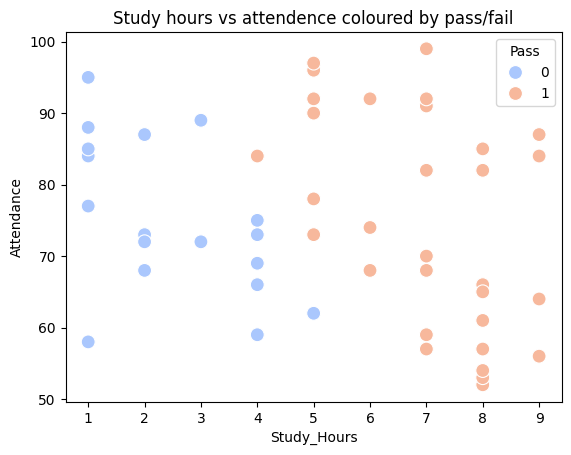

In [15]:
sns.scatterplot(x='Study_Hours', y='Attendance', hue='Pass', data=df, palette='coolwarm', s=100)
plt.title('Study hours vs attendence coloured by pass/fail')
plt.show()

In [16]:
X=df[['Study_Hours', 'Attendance']]
y=df['Pass']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=12)

In [22]:
from sklearn.linear_model import LogisticRegression 

In [23]:
log_reg= LogisticRegression()

In [24]:
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_pred= log_reg.predict(X_test)
y_prob=log_reg.predict_proba(X_test)[:,1]

In [27]:
pd.DataFrame({'ACtual': y_test, 'Predicted': y_pred, 'Probability_of_pass': y_prob})

,ACtual,Predicted,Probability_of_pass
28,1,1,0.710107
46,0,0,0.268531
7,1,1,0.900773
41,1,1,0.998052
36,1,1,0.977034
29,1,0,0.427300
21,0,0,0.037023
48,1,1,0.994356
19,1,1,0.575122
8,0,0,0.023247


In [28]:
new_student=np.array([[9,25]])

In [30]:
pred_class=log_reg.predict(new_student)
print(f"Predicted class(0=Fail, 1=Paa): {pred_class[0]}")

Predicted class(0=Fail, 1=Paa): 1


/home/ritu-bisht/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
pred_prob=log_reg.predict_proba(new_student)[0][1]
print(f"Probability of passing:{pred_prob:.2f}")

Probability of passing:0.90


/home/ritu-bisht/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nConfusion matrix:\n', confusion_matrix(y_test,y_pred))
print('\nClassification report:\n', classification_report(y_test,y_pred))



Accuracy: 0.9

Confusion matrix:
 [[3 0]
 [1 6]]

Classification report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [116]:
# Let's use a sample student's record
study = 10
attendance = 1

In [117]:
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
b2 = log_reg.coef_[0][1]

print(f"Intercept (b0): {b0:.4f}")
print(f"Coefficient for Study Hours (b1): {b1:.4f}")
print(f"Coefficient for Attendance (b2): {b2:.4f}")

Intercept (b0): -17.8595
Coefficient for Study Hours (b1): 1.9005
Coefficient for Attendance (b2): 0.1186


In [118]:
z = b0 + (b1 * study) + (b2 * attendance)
print("Linear Combination (z):", z)

Linear Combination (z): 1.264455790703255


In [119]:
prob = 1 / (1 + np.exp(-z))
print("Predicted Probability of Pass:", prob)

Predicted Probability of Pass: 0.7797921936077038


In [120]:
if prob >= 0.5:
    print("Predicted Class: 1 (Pass)")
else:
    print("Predicted Class: 0 (Fail)")

Predicted Class: 1 (Pass)
